In [1]:
import pandas as pd
import pynbody 
import numpy as np 
import tangos

import sys
sys.path.insert(0, '../util/')
from util import util

import matplotlib.pyplot as plt

### Quantities to obtain for each galaxy
* w20 (our HI profile)
* Mbar (pynbody)
* Mstar (pynbody)
* MHI (pynbody)
* SFR (tangos?)
* SFR/MHI (can try SFE but may not be accurate for dwarfs) (pynbody)
* $\langle \Sigma_{SFR} \rangle$
* $\langle \Sigma_{HI} \rangle$ 
* $\langle \Sigma_{baryon} \rangle$

Also, spearman rank correlation coefficient for each pair 

In [4]:
f = '/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096'

In [5]:
s = pynbody.load(f)
s.physical_units()
h = s.halos()[1]

cen_pot_a = pynbody.analysis.halo.center(h, mode='pot', retcen=True)
s['pos'] -= cen_pot_a

In [17]:
s['HI']

UnitsException: Not convertible

In [4]:
h.all_keys()

['HII',
 'HeIII',
 'ne',
 'hetot',
 'hydrogen',
 'feh',
 'oxh',
 'ofe',
 'mgfe',
 'nefe',
 'sife',
 'c_s',
 'c_s_turb',
 'mjeans',
 'mjeans_turb',
 'ljeans',
 'ljeans_turb',
 'r',
 'rxy',
 'vr',
 'v2',
 'vt',
 'ke',
 'te',
 'j',
 'j2',
 'jz',
 'vrxy',
 'vcxy',
 'vphi',
 'vtheta',
 'v_mean',
 'v_disp',
 'v_curl',
 'vorticity',
 'v_div',
 'age',
 'u_mag',
 'u_lum_den',
 'b_mag',
 'b_lum_den',
 'v_mag',
 'v_lum_den',
 'r_mag',
 'r_lum_den',
 'i_mag',
 'i_lum_den',
 'j_mag',
 'j_lum_den',
 'h_mag',
 'h_lum_den',
 'k_mag',
 'k_lum_den',
 'U_mag',
 'U_lum_den',
 'B_mag',
 'B_lum_den',
 'V_mag',
 'V_lum_den',
 'R_mag',
 'R_lum_den',
 'I_mag',
 'I_lum_den',
 'J_mag',
 'J_lum_den',
 'H_mag',
 'H_lum_den',
 'K_mag',
 'K_lum_den',
 'theta',
 'alt',
 'az',
 'cs',
 'mu',
 'p',
 'u',
 'temp',
 'zeldovich_offset',
 'aform',
 'tform',
 'iord_argsort',
 'smooth',
 'rho',
 'c',
 'vel',
 'amiga.grp',
 'massHot',
 'HI',
 'phi',
 'mass',
 'pos',
 'tempEff',
 'uHot',
 'lw',
 'coolontime',
 'FeMassFrac',
 'e

In [5]:
Mstar = h.s['mass'].sum()
Mhi = h.g['mass'] / 1.36
Mbar = Mstar + h.g['mass']

$\Sigma_{SFR} = (8.1\times 10^{-2}I_{FUV} + 3.2 \times 10^{-3}I_{24}) \cos i$

In [6]:
len(s['pos'])

25953621

In [7]:
len(h.g['v_disp'])

2777645

In [8]:
len(h.g['pos'])

2777645

In [9]:
len(h.g['HII'])

2777645

In [10]:
len(h.g['HI'])

2777645

In [11]:
h.star

<SimSnap "/data/REPOSITORY/e11Gals/romulus_dwarf_zooms/r431.romulus25.3072g1HsbBH/r431.romulus25.3072g1HsbBH.004096/r431.romulus25.3072g1HsbBH.004096:halo_1::star" len=2292934>

In [12]:
tsim = tangos.all_simulations()[0]
tstep = tsim.timesteps[-6]

In [13]:
th = tstep.halos[430]

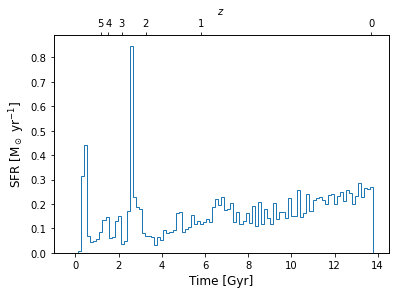

In [17]:
sfhR, sfhTime = pynbody.plot.stars.sfh(s)

In [26]:
sum(sfhR[0:3])

9.329258318757638e-05

In [24]:
sfhR

SimArray([9.32925832e-05, 0.00000000e+00, 0.00000000e+00, 9.20100417e-03,
          3.13036323e-01, 4.39488351e-01, 6.88755363e-02, 4.37659919e-02,
          4.87107262e-02, 5.64812757e-02, 8.36603194e-02, 1.33224979e-01,
          1.47374928e-01, 6.02338575e-02, 6.56008497e-02, 1.31980032e-01,
          1.48687214e-01, 3.67463492e-02, 4.90486994e-02, 1.71831831e-01,
          8.48051250e-01, 2.26580948e-01, 1.86193317e-01, 1.80682048e-01,
          8.12792554e-02, 6.93594888e-02, 6.90002292e-02, 6.58497214e-02,
          3.23367789e-02, 6.62516430e-02, 5.30137233e-02, 9.13545415e-02,
          8.24608058e-02, 8.56054649e-02, 9.50031877e-02, 1.63573593e-01,
          1.68716788e-01, 8.67518634e-02, 9.85393673e-02, 1.04508899e-01,
          1.53603986e-01, 1.17860653e-01, 1.31783709e-01, 1.17677748e-01,
          1.26307234e-01, 1.38303146e-01, 1.25425115e-01, 1.87745124e-01,
          2.21638680e-01, 1.95117489e-01, 2.28963554e-01, 1.76886946e-01,
          1.78404123e-01, 2.04961672e-

In [19]:
sfhTime

SimArray([-2.94936078e-01, -1.53987502e-01, -1.30389261e-02,
           1.27909650e-01,  2.68858226e-01,  4.09806802e-01,
           5.50755378e-01,  6.91703954e-01,  8.32652530e-01,
           9.73601106e-01,  1.11454968e+00,  1.25549826e+00,
           1.39644683e+00,  1.53739541e+00,  1.67834399e+00,
           1.81929256e+00,  1.96024114e+00,  2.10118971e+00,
           2.24213829e+00,  2.38308687e+00,  2.52403544e+00,
           2.66498402e+00,  2.80593259e+00,  2.94688117e+00,
           3.08782975e+00,  3.22877832e+00,  3.36972690e+00,
           3.51067547e+00,  3.65162405e+00,  3.79257263e+00,
           3.93352120e+00,  4.07446978e+00,  4.21541835e+00,
           4.35636693e+00,  4.49731551e+00,  4.63826408e+00,
           4.77921266e+00,  4.92016123e+00,  5.06110981e+00,
           5.20205838e+00,  5.34300696e+00,  5.48395554e+00,
           5.62490411e+00,  5.76585269e+00,  5.90680126e+00,
           6.04774984e+00,  6.18869842e+00,  6.32964699e+00,
           6.47059557e+0

In [29]:
Rvir = pynbody.analysis.halo.virial_radius(s)

In [34]:
sum(sfhR[0:3])/(4*3.14*(Rvir/1000)**2)

SimArray(0.00031507, 'kpc**-2')

## Getting Sigma SFR for Each Galaxy

In [7]:
# get SIDM Galaxies
gals = util.getGalaxies()[0]

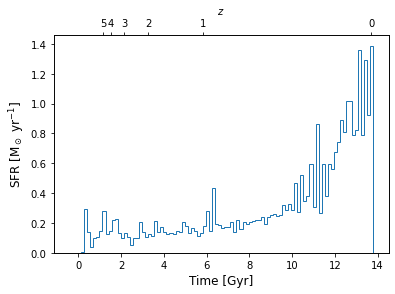

In [62]:
# select galaxy
g = gals[7]

# load file 
fpath = util.getfilepath(g)[0] + '/r'+str(g)+'.romulus25.3072g1HsbBH.004096'
s = pynbody.load(fpath)

s.physical_units()
h = s.halos()[1]

cen_pot_a = pynbody.analysis.halo.center(h, mode='pot', retcen=True)
s['pos'] -= cen_pot_a
h = s.halos()[1]

# get Rvir 
Rvir = pynbody.analysis.halo.virial_radius(s)
# get sfh info
sfhR, sfhTime = pynbody.plot.stars.sfh(s)

In [63]:
Rvir

SimArray(186.82477631, 'kpc')

In [44]:
sfhR

SimArray([6.98401614e-05, 6.98250716e-05, 0.00000000e+00, 0.00000000e+00,
          7.64582705e-03, 2.94288720e-01, 1.39411048e-01, 3.83897325e-02,
          9.81428500e-02, 1.07554555e-01, 1.48351152e-01, 2.77246013e-01,
          1.28338175e-01, 1.47321647e-01, 2.16562910e-01, 2.25215232e-01,
          1.32702963e-01, 9.70324259e-02, 1.30750118e-01, 1.07725863e-01,
          5.31856298e-02, 9.83413956e-02, 1.02342221e-01, 2.07718448e-01,
          1.38999906e-01, 1.05588738e-01, 1.26436614e-01, 1.11245038e-01,
          2.12715969e-01, 1.36385434e-01, 1.70486844e-01, 1.40967712e-01,
          1.28525086e-01, 1.33698728e-01, 1.23465175e-01, 1.44003863e-01,
          1.40742103e-01, 2.05200697e-01, 1.80014534e-01, 1.34884378e-01,
          1.63385789e-01, 1.46106901e-01, 1.10811298e-01, 1.33763270e-01,
          1.76651998e-01, 2.77433395e-01, 1.48501535e-01, 4.35759219e-01,
          1.94562602e-01, 1.88991512e-01, 1.64961151e-01, 1.75841182e-01,
          1.73656068e-01, 2.09799303e-

In [45]:
sfhTime.in_units('Myr')

SimArray([-4.37111532e+02, -2.94741201e+02, -1.52370871e+02,
          -1.00005403e+01,  1.32369790e+02,  2.74740121e+02,
           4.17110451e+02,  5.59480782e+02,  7.01851112e+02,
           8.44221443e+02,  9.86591773e+02,  1.12896210e+03,
           1.27133243e+03,  1.41370276e+03,  1.55607310e+03,
           1.69844343e+03,  1.84081376e+03,  1.98318409e+03,
           2.12555442e+03,  2.26792475e+03,  2.41029508e+03,
           2.55266541e+03,  2.69503574e+03,  2.83740607e+03,
           2.97977640e+03,  3.12214673e+03,  3.26451706e+03,
           3.40688739e+03,  3.54925772e+03,  3.69162805e+03,
           3.83399838e+03,  3.97636871e+03,  4.11873904e+03,
           4.26110938e+03,  4.40347971e+03,  4.54585004e+03,
           4.68822037e+03,  4.83059070e+03,  4.97296103e+03,
           5.11533136e+03,  5.25770169e+03,  5.40007202e+03,
           5.54244235e+03,  5.68481268e+03,  5.82718301e+03,
           5.96955334e+03,  6.11192367e+03,  6.25429400e+03,
           6.39666433e+0

In [46]:
g

615

In [47]:
beg = 4
end = 5
#sum(sfhR[beg:end])/(4*3.14*((Rvir/1000)**2))
#sum(sfhR[beg:end])/(3.14*((Rvir/1000)**2))
sum(sfhR[beg:end])

0.007645827047909164

In [ ]:
sum(sfhR[beg:end]), sum(sfhR[beg:end])/(3.14*((Rvir/1000)**2))

In [60]:
sfhR[0:1]

SimArray([0.0174002], 'Msol yr**-1')

In [41]:
# not sure this is a good method
s.stars['tform'].in_units('Myr')

SimArray([  183.04653256,   190.61801448,   190.61801448, ...,
          13800.76287059, 13800.76287059, 13800.76287059], 'Myr')

## Zoom Masses

In [111]:
# get SIDM Galaxies
gals = util.getGalaxies()[0]

# select galaxy
g = gals[6]

# load file 
fpath = util.getfilepath(g)[0] + '/r'+str(g)+'.romulus25.3072g1HsbBH.004096'
s = pynbody.load(fpath)

s.physical_units()
h = s.halos()[1]

cen_pot_a = pynbody.analysis.halo.center(h, mode='pot', retcen=True)
s['pos'] -= cen_pot_a
h = s.halos()[1]
g

597

In [112]:
"{:e}".format(sum(s.g['mass'])+sum(s.s['mass']))

'1.319043e+10'

In [113]:
"{:e}".format(sum(s.s['mass']))

'6.514049e+08'

In [114]:
"{:e}".format(sum(s.g['mass']))

'1.253903e+10'